# Aula 01: Importando e traduzindo os dados

## Importando os dados

In [34]:
import pandas as pd

In [35]:
arquivo = 'arquivos/tips.csv'
gorjetas= pd.read_csv(arquivo)
gorjetas.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo colunas e campos

In [36]:
nomes_colunas = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
}

gorjetas.rename(columns=nomes_colunas, inplace=True)

In [37]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [38]:
# Campos
campo_sobremesa = {
    'No': 'Não',
    'Yes': 'Sim'
}

campo_dia_da_semana = {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

campo_hora_do_dia = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}


gorjetas.sobremesa = gorjetas.sobremesa.map(campo_sobremesa)
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(campo_dia_da_semana)
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(campo_hora_do_dia)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Aula 02: Comparando distribuições de maneira exploratória

## Seaborn e scatterplot

In [39]:
import seaborn as sns

In [40]:
# Análise 01 - Valor da conta e gorjeta

In [41]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

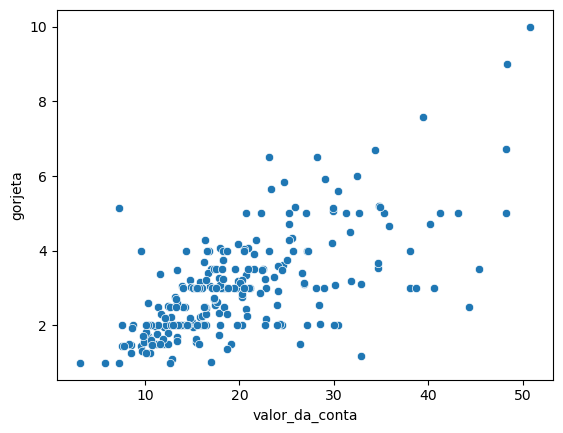

In [42]:
x = 'valor_da_conta'
y = 'gorjeta'
data = gorjetas
valor_gorjeta = sns.scatterplot(x=x, y=y, data=data)
valor_gorjeta = valor_gorjeta.get_figure()

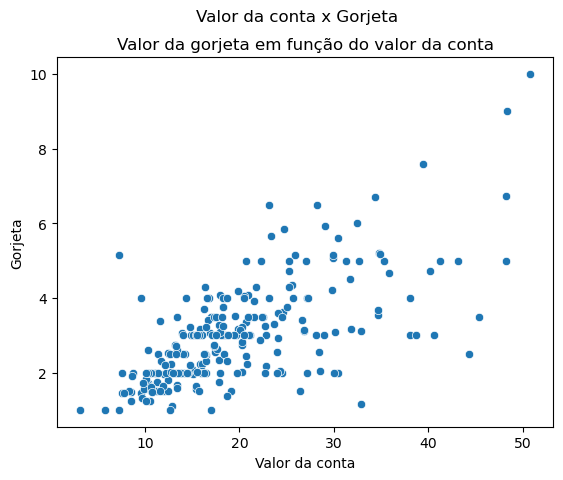

In [43]:
# editando a figura
suptitulo = 'Valor da conta x Gorjeta'
valor_gorjeta.suptitle(suptitulo)

titulo = 'Valor da gorjeta em função do valor da conta'
valor_gorjeta.axes[0].set_title(titulo)

xlabel = 'Valor da conta'
ylabel = 'Gorjeta'
valor_gorjeta.axes[0].set(xlabel=xlabel, ylabel=ylabel)
valor_gorjeta

In [44]:
# Observações
# - Visualmente, o valor da gorjeta aumenta com o valor da conta

In [45]:
valor_gorjeta.savefig('valor_gorjeta.png')

In [46]:
# Verificando se há registros nulos
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


## Coluna porcentagem

In [47]:
# Análise 01 (Pt. 2) - Criando o campo porcentagem
campo_porcentagem = (gorjetas.gorjeta / gorjetas.valor_da_conta) * 100
gorjetas['porcentagem'] = campo_porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


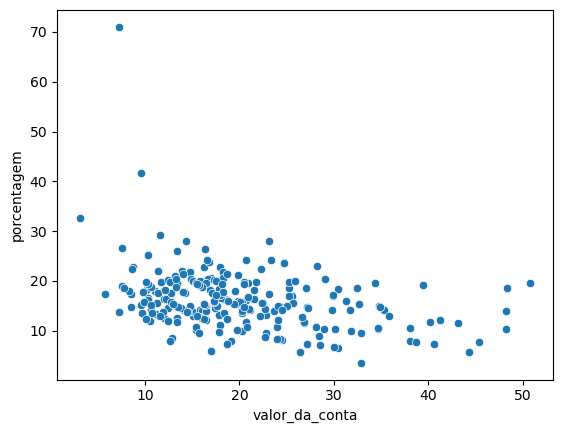

In [48]:
x = gorjetas.valor_da_conta
y = gorjetas.porcentagem
data = gorjetas
porcentagem_conta = sns.scatterplot(x=x, y=y, data=data)

In [49]:
# Observações
# - Visualmente, o valor da conta não é proporcional ao valor da gorjeta

## Relplot e lmplot

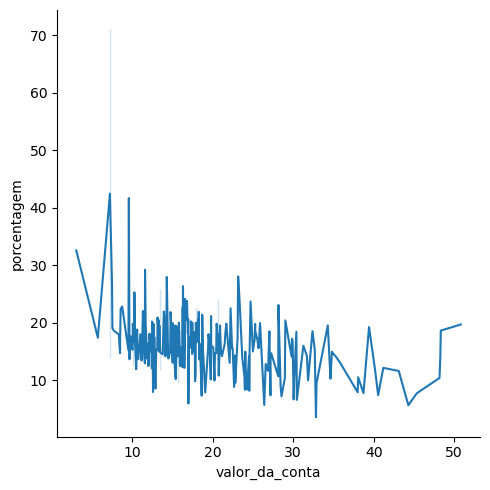

In [50]:
# relplot
x = gorjetas.valor_da_conta
y = gorjetas.porcentagem
data = gorjetas
kind = 'line'
porcentagem_conta_linha = sns.relplot(x=x, y=y, kind=kind, data=data)
porcentagem_conta_linha

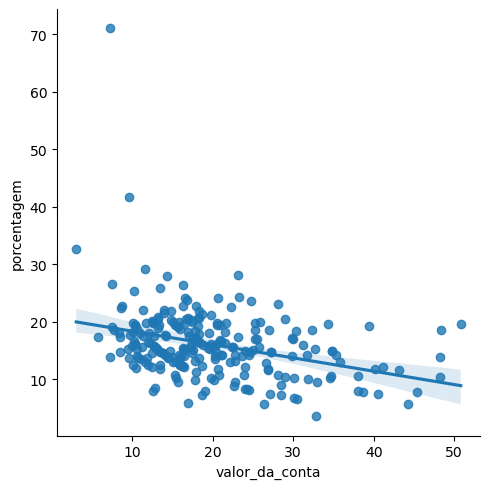

In [51]:
# lmplot
x = 'valor_da_conta'
y = 'porcentagem'
data = gorjetas
porcentagem_conta_lm = sns.lmplot(x=x, y=y, data=data)
porcentagem_conta_lm

# Aula 03: Analisando de forma visual e decritiva

## Análise descritiva

In [52]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [53]:
# Análise 2 - Sobremesa
pediram_sobremesa = gorjetas.sobremesa == 'Sim'
df_pediram_sobremesa = gorjetas[pediram_sobremesa]
df_pediram_sobremesa.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,7.89
58,11.24,1.76,Sim,Sábado,Jantar,2,15.66
60,20.29,3.21,Sim,Sábado,Jantar,2,15.82
61,13.81,2.00,Sim,Sábado,Jantar,2,14.48
62,11.02,1.98,Sim,Sábado,Jantar,2,17.97


In [54]:
df_pediram_sobremesa.describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [55]:
nao_pediram_sobremesa = gorjetas.sobremesa == 'Não'
df_nao_pediram_sobremesa = gorjetas[nao_pediram_sobremesa]
df_nao_pediram_sobremesa.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [56]:
df_nao_pediram_sobremesa.describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


## Análise visual

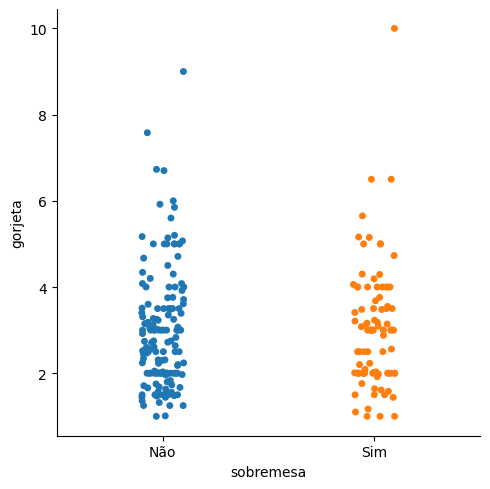

In [57]:
# plot de classificação (catplot)
x = gorjetas.sobremesa
y = gorjetas.gorjeta
data = gorjetas
sns.catplot(x=x, y=y, hue=x, data=data)

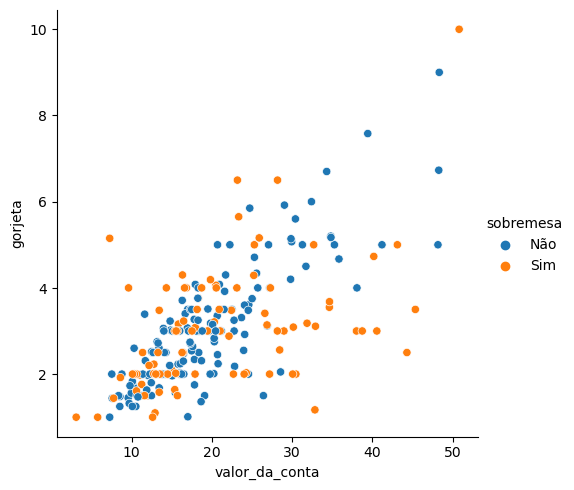

In [58]:
# relplot
x = gorjetas.valor_da_conta
y = gorjetas.gorjeta
hue = gorjetas.sobremesa
data = gorjetas
sns.relplot(x=x, y=y, hue=hue, data=data)

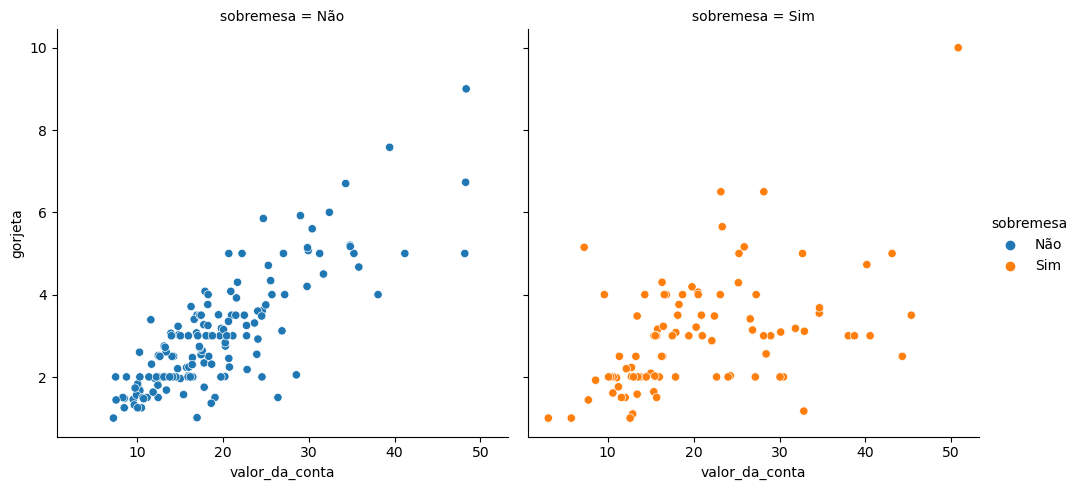

In [59]:
x = gorjetas.valor_da_conta
y = gorjetas.gorjeta
hue = gorjetas.sobremesa
col = gorjetas.sobremesa
data = gorjetas
sns.relplot(x=x, y=y, hue=hue, col=col, data=data)

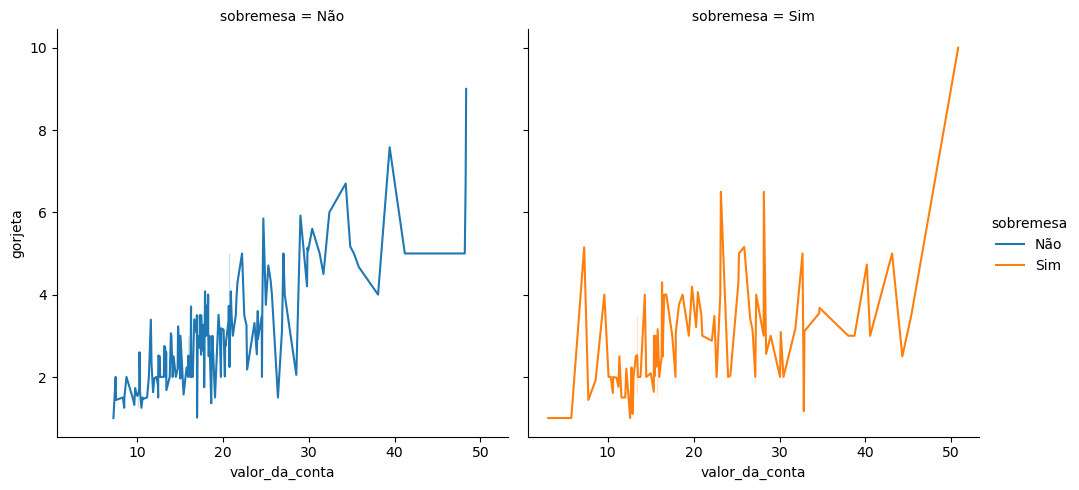

In [60]:
x = gorjetas.valor_da_conta
y = gorjetas.gorjeta
hue = gorjetas.sobremesa
col = gorjetas.sobremesa
kind = 'line'
data = gorjetas
sns.relplot(x=x, y=y, hue=hue, col=col, kind=kind, data=data)

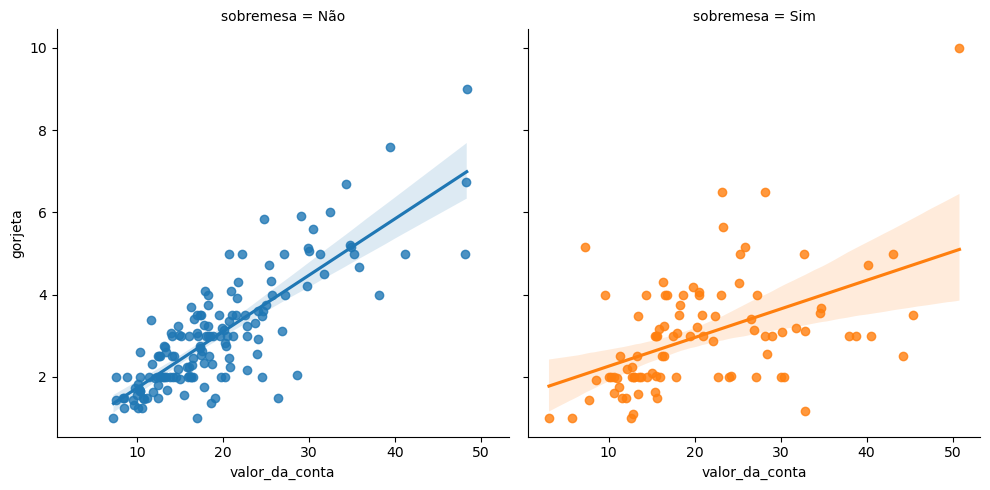

In [61]:
# lmplot
x = 'valor_da_conta'
y = 'gorjeta'
hue = 'sobremesa'
col = 'sobremesa'
data = gorjetas
sns.lmplot(x=x, y=y, hue=hue, col=col, data=data)

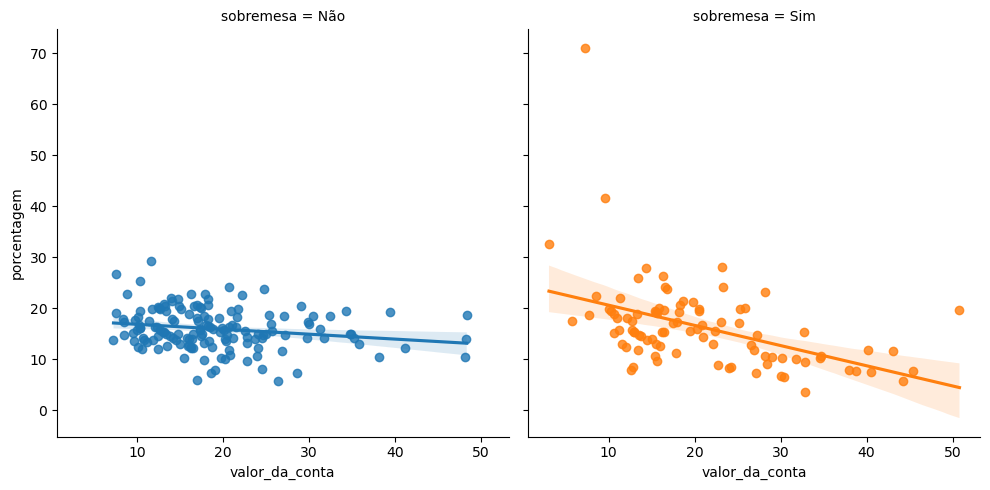

In [62]:
x = 'valor_da_conta'
y = 'porcentagem'
hue = 'sobremesa'
col = 'sobremesa'
data = gorjetas
sns.lmplot(x=x, y=y, hue=hue, col=col, data=data)

In [63]:
# Visualmente, existem uma diferença no valor da gorjeta entre
# aqueles que pediram sobremesa e aqueles que não pediram

## Teste de hipótese

### **H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

### **H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [64]:
from scipy.stats import ranksums

sobremesa_sim_query = 'sobremesa == "Sim"'
sobremesa = gorjetas.query(sobremesa_sim_query).porcentagem

sobremesa_nao_query = 'sobremesa == "Não"'
sem_sobremesa = gorjetas.query(sobremesa_nao_query).porcentagem

r = ranksums(sobremesa, sem_sobremesa)

In [65]:
# Para a hipósete alternativa ser aceia, pvalue <= 0.05
# Hipótese alternativa descartada
print(f'O valor do p-value é {r.pvalue.round(2)}')

O valor do p-value é 0.56


In [66]:
# A distribuição da taxa da gorjeta é a mesma nos dois grupos

# Aula 04: Comparando e explorando os dias da semana

## Dias da semana

In [68]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [69]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

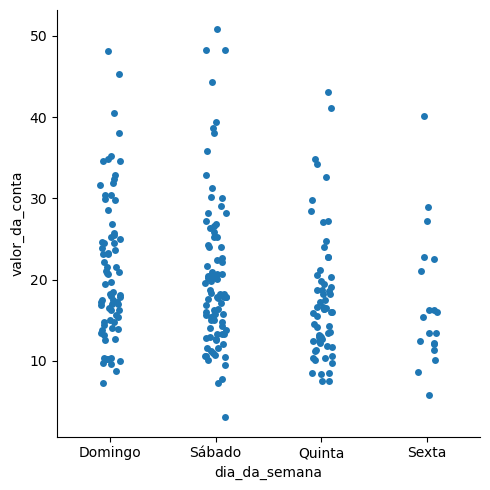

In [71]:
x = gorjetas.dia_da_semana
y = gorjetas.valor_da_conta
data = gorjetas
sns.catplot(x=x, y=y, data=data)

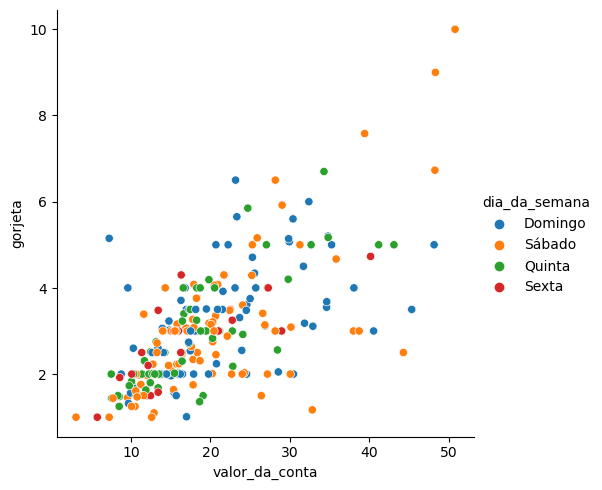

In [73]:
x = gorjetas.valor_da_conta
y = gorjetas.gorjeta
data = gorjetas
hue = gorjetas.dia_da_semana
sns.relplot(x=x, y=y, hue=hue, data=data)

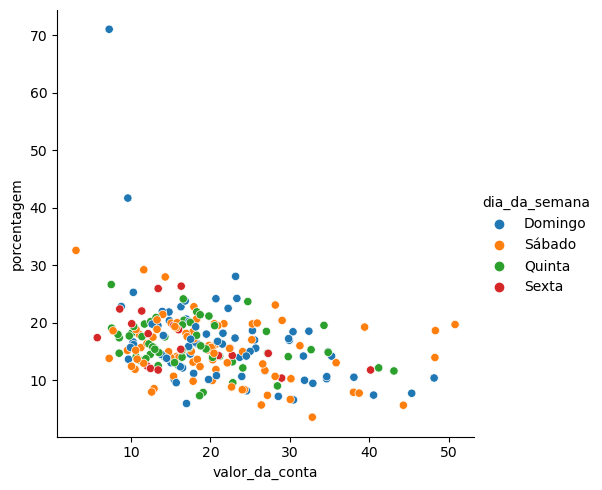

In [74]:
x = gorjetas.valor_da_conta
y = gorjetas.porcentagem
data = gorjetas
hue = gorjetas.dia_da_semana
sns.relplot(x=x, y=y, hue=hue, data=data)

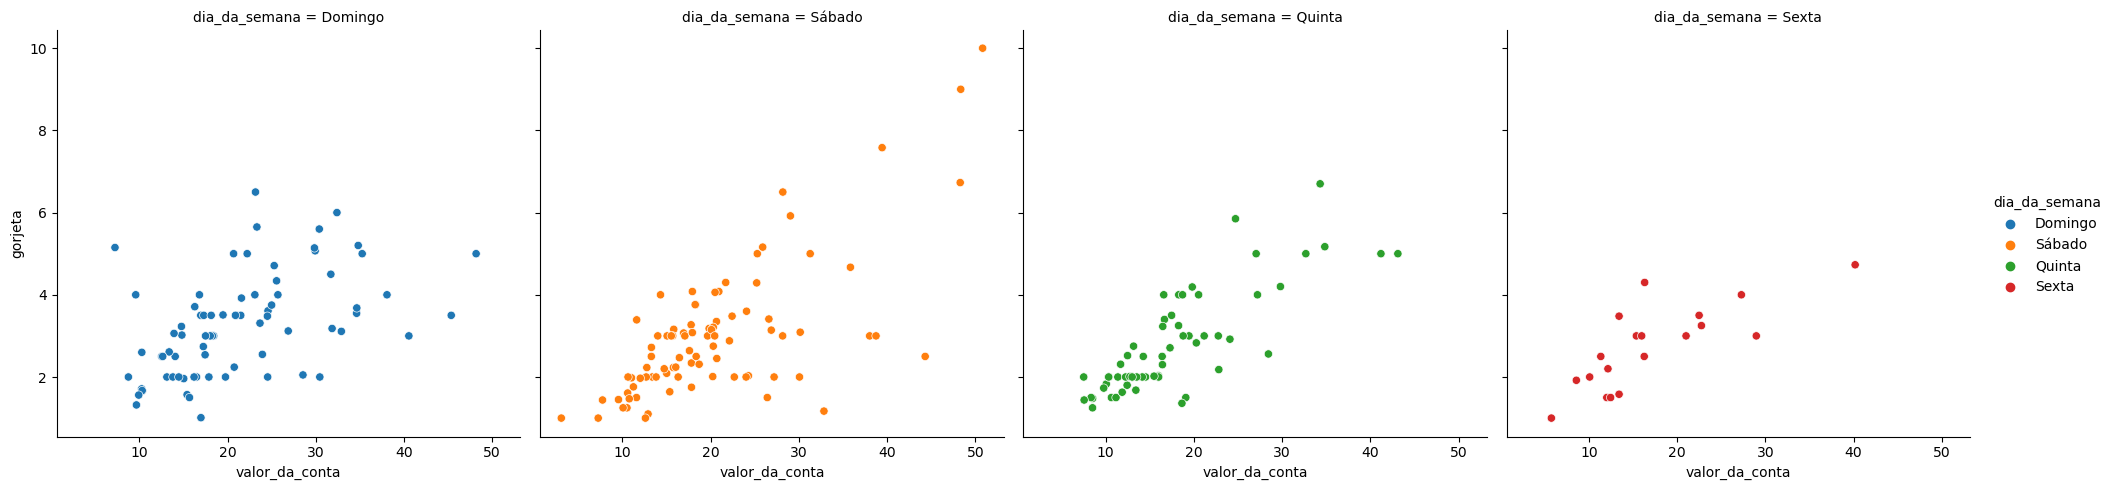

In [75]:
x = gorjetas.valor_da_conta
y = gorjetas.gorjeta
data = gorjetas
hue = gorjetas.dia_da_semana
col = gorjetas.dia_da_semana
sns.relplot(x=x, y=y, hue=hue, col=col, data=data)

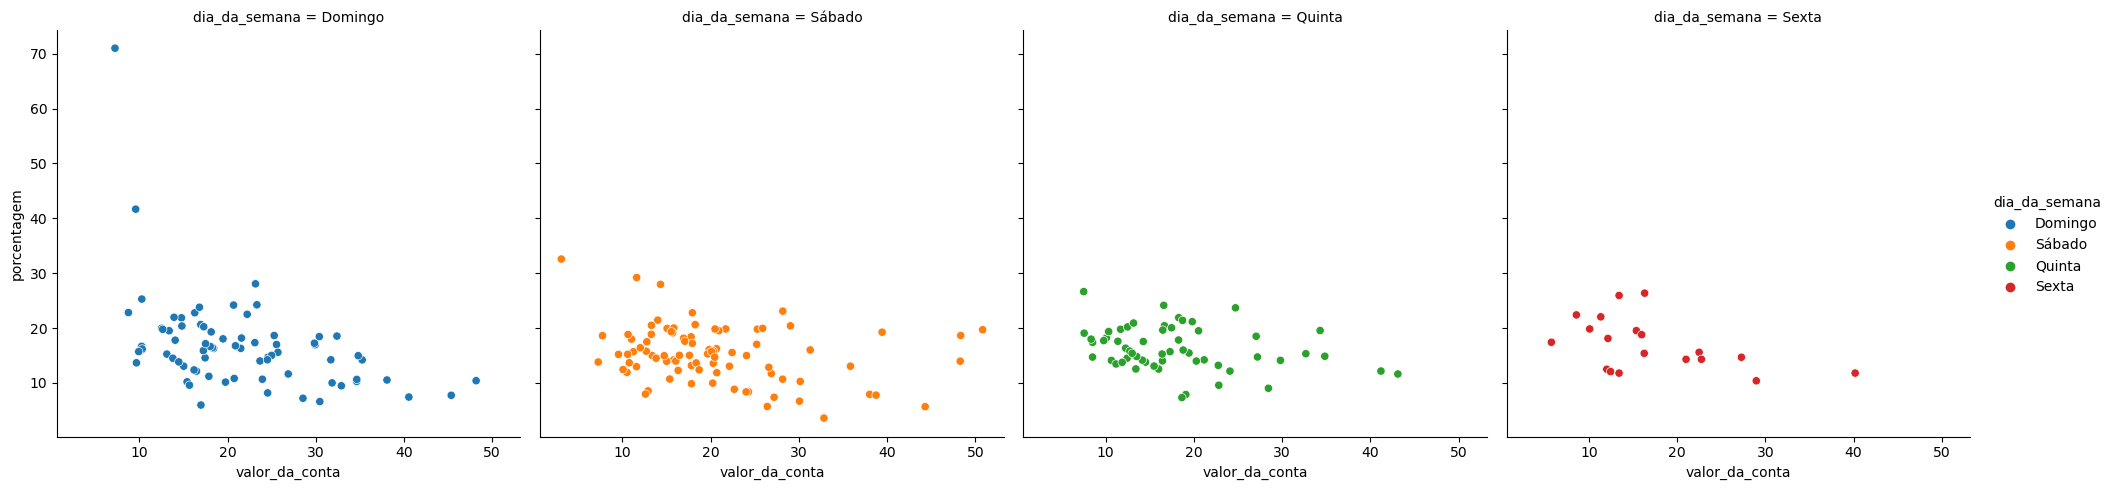

In [76]:
x = gorjetas.valor_da_conta
y = gorjetas.porcentagem
data = gorjetas
hue = gorjetas.dia_da_semana
col = gorjetas.dia_da_semana
sns.relplot(x=x, y=y, hue=hue, col=col, data=data)

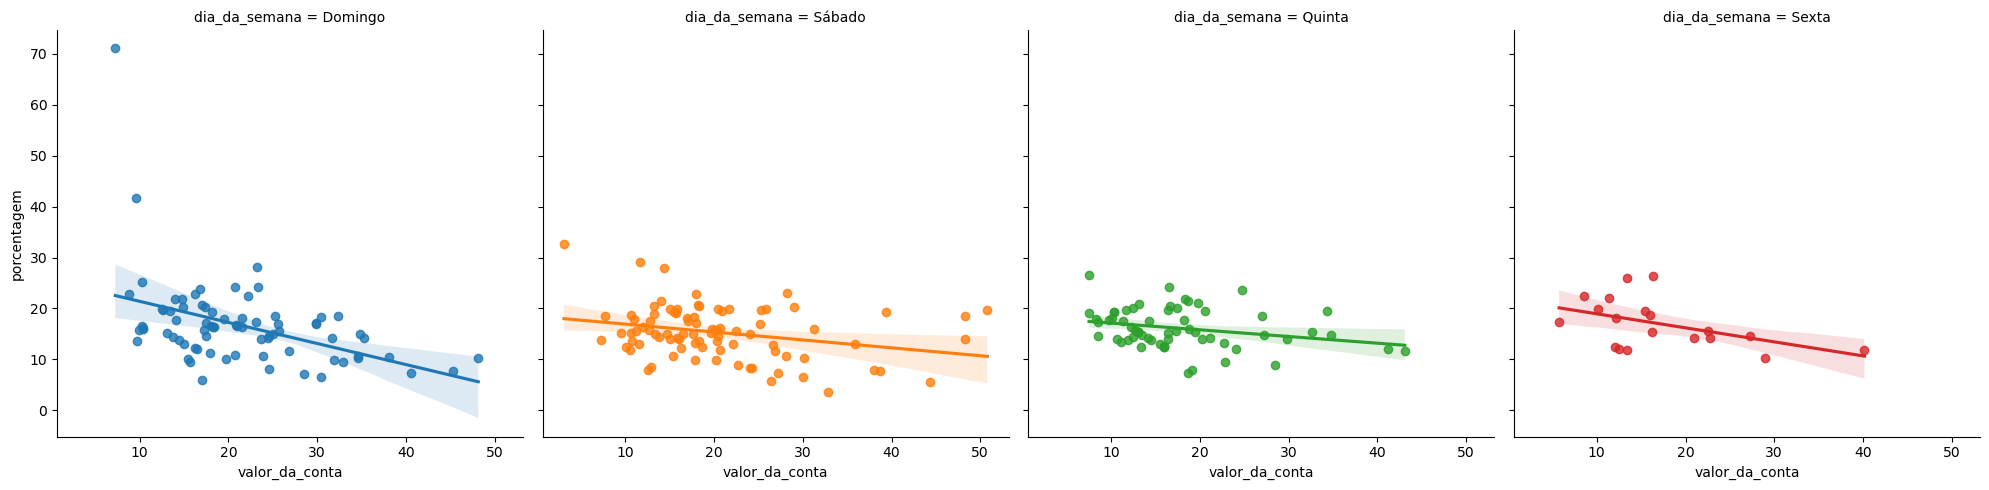

In [82]:
x = 'valor_da_conta'
y = 'porcentagem'
data = gorjetas
hue = 'dia_da_semana'
col = 'dia_da_semana'
sns.lmplot(x=x, y=y, hue=hue, col=col, data=data)

## Análise descritiva

In [87]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print(f'A média geral das gorjetas é {round(media_geral_gorjetas, 3)}')

A média geral das gorjetas é 2.998


In [89]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,16.689605
Quinta,17.682742,2.771452,16.126452
Sexta,17.151579,2.734737,16.991579
Sábado,20.441379,2.993103,15.314598


In [91]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

### **H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

### **H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [95]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [100]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


In [98]:
# A distribuição do valor da conta é igual no sábado e no domingo (Hipótese nula)